<a href="https://colab.research.google.com/github/anujthapamagar/FEDS/blob/main/Machine_learningII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning

## 1 Get the data

In [74]:
import requests
from pathlib import Path

# storage for data in collab environment
data_path = Path("data/")

# If the data folder doesn't exist, download it and prepare it..
if data_path.is_dir():
  print(f"{data_path} directory already exists... skipping creation")
else:
  print(f"{data_path} does not exist, creating one...")
  data_path.mkdir(parents=True, exist_ok=True)

# Download temp data
with open(data_path / "music.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/FEDS/main/data/music.csv")
  print("Downloading data...")
  f.write(request.content)

data directory already exists... skipping creation


## 2 Train a DecisionTree Model
**We learn** how to make the computer predict and make decisions
We need to import from `sklearn` the decision Tree package, the model selection package and some metrics package

## The music recommender

In [75]:
import pandas as pd
import numpy as np

## use ML libs from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
df = pd.read_csv("data/music.csv")
df.head(2)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop


## 2.2 Split data into feature and the labels
We have the age and the gender as features and the music genre as label

In [77]:
X = df.drop(columns=["genre"]).values
X

array([[20,  1],
       [23,  1],
       [25,  1],
       [26,  1],
       [29,  1],
       [30,  1],
       [31,  1],
       [33,  1],
       [37,  1],
       [20,  0],
       [21,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [30,  0],
       [31,  0],
       [34,  0],
       [35,  0]])

In [78]:
y = df["genre"].values
y

array(['HipHop', 'HipHop', 'HipHop', 'Jazz', 'Jazz', 'Jazz', 'Classical',
       'Classical', 'Classical', 'Dance', 'Dance', 'Dance', 'Acoustic',
       'Acoustic', 'Acoustic', 'Classical', 'Classical', 'Classical'],
      dtype=object)

### 2.3 Fit all the data

In [79]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

### 2.4 Make prediction
Let's use something thats not in the data

Let's use the male of age 21 and female of age 22!

In [80]:
predictions = model.predict([[21, 1], [22, 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [81]:
predictions = model.predict([[35, 1], [22, 0], [27, 1], [33, 0]])
predictions

array(['Classical', 'Dance', 'Jazz', 'Classical'], dtype=object)

## 3 Test the model accuracy

### 3.1 Split data into testing and training data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
X_train

array([[31,  0],
       [29,  1],
       [21,  0],
       [26,  1],
       [35,  0],
       [25,  0],
       [30,  0],
       [27,  0],
       [34,  0],
       [23,  1],
       [37,  1],
       [20,  0],
       [33,  1],
       [20,  1]])

In [84]:
X_test

array([[26,  0],
       [25,  1],
       [30,  1],
       [31,  1]])

In [85]:
y

array(['HipHop', 'HipHop', 'HipHop', 'Jazz', 'Jazz', 'Jazz', 'Classical',
       'Classical', 'Classical', 'Dance', 'Dance', 'Dance', 'Acoustic',
       'Acoustic', 'Acoustic', 'Classical', 'Classical', 'Classical'],
      dtype=object)

In [86]:
y_train

array(['Classical', 'Jazz', 'Dance', 'Jazz', 'Classical', 'Dance',
       'Acoustic', 'Acoustic', 'Classical', 'HipHop', 'Classical',
       'Dance', 'Classical', 'HipHop'], dtype=object)

In [87]:
y_test

array(['Acoustic', 'HipHop', 'Jazz', 'Classical'], dtype=object)

### 3.2 Fit a new model with split datasets

In [88]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 3.3 Make new predictions and check accuracy

In [89]:
predictions2 = model.predict(X_test)
predictions2

array(['Dance', 'Jazz', 'Jazz', 'Classical'], dtype=object)

In [90]:
score = accuracy_score(y_test, predictions2)
score

0.5

In [91]:
scores = []

for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, pred))
  print(scores[i])

print(f"\naverage score: {np.mean(scores)}")

0.5
0.5
0.75
1.0
1.0
0.75
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0

average score: 0.875


## 4 Visualise the decision tree

In [92]:
import graphviz

from sklearn import tree 

In [100]:
dot_data = tree.export_graphviz(model, 
                                out_file = None,
                                feature_names = ["age", "gender"],
                                class_names = sorted(np.unique(y).tolist()),
                                filled = True,
                                rounded = True,
                                special_characters = True)

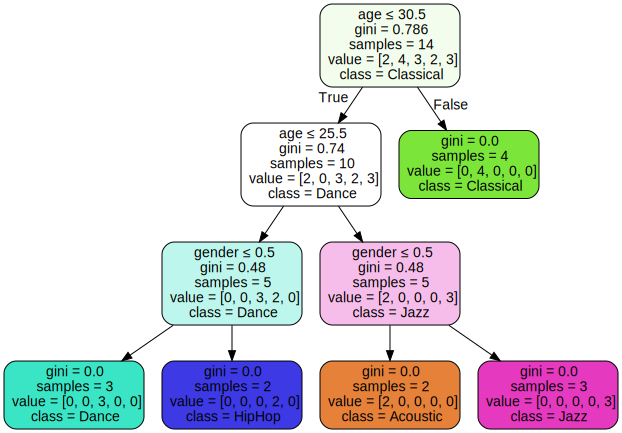

In [101]:
graph = graphviz.Source(dot_data)
graph